In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

# Results - Shortest Path

In [14]:
dir_labels = os.getcwd() + '\\GeneSets\\AMR'
labels = os.listdir(dir_labels)[:-1]

In [15]:
labels

['PLF_590_00000215',
 'PLF_590_00000236',
 'PLF_590_00000441',
 'PLF_590_00000543',
 'PLF_590_00001611',
 'PLF_590_00001982',
 'PLF_590_00002421',
 'PLF_590_00002480',
 'PLF_590_00002841',
 'PLF_590_00003204',
 'PLF_590_00024086']

In [3]:
root = os.getcwd() + '\\GeneSets\\AMR\\Results'

In [4]:
samples = len(os.listdir(root))

In [5]:
result_example = root + '\\' + os.listdir(root)[0] + '\\all\\f1.tab'

with open(result_example, 'r') as result:
    antibiotics = []
    for line in result:
        antibiotics.append(line.split('\t')[0])

In [6]:
results = pd.DataFrame(index = antibiotics, columns = range(samples))
std = pd.DataFrame(index = antibiotics, columns = range(samples))

for j in range(samples):
    result_file = root + '\\' + os.listdir(root)[j] + '\\all\\f1.tab'
    with open(result_file, 'r') as result:
        for line in result:
            values = line.split('\t')
            results.loc[values[0]][j] = np.around(float(values[1]), decimals = 3)
            std.loc[values[0]][j] = np.around(float(values[1]) - float(values[2]), decimals = 3)

In [7]:
results

,0,1,2,3,4,5,6,7,8,9,10
ALL,0.7,0.253,0.659,0.644,0.654,0.66,0.658,0.679,0.651,0.662,0.643
AMP,0.677,0.287,0.648,0.634,0.639,0.638,0.625,0.68,0.647,0.644,0.663
AUG,0.703,0.197,0.612,0.605,0.658,0.613,0.644,0.653,0.634,0.621,0.62
AXO,0.706,0.187,0.587,0.584,0.631,0.626,0.641,0.649,0.634,0.598,0.614
CHL,0.523,0.049,0.536,0.471,0.439,0.551,0.516,0.503,0.437,0.494,0.459
FIS,0.744,0.323,0.733,0.739,0.727,0.739,0.753,0.738,0.741,0.727,0.728
FOX,0.687,0.176,0.556,0.555,0.629,0.586,0.609,0.632,0.617,0.579,0.591
GEN,0.634,0.149,0.658,0.578,0.625,0.582,0.56,0.584,0.609,0.633,0.599
KAN,0.583,0.323,0.492,0.528,0.487,0.581,0.473,0.387,0.483,0.643,0.428
STR,0.681,0.43,0.695,0.635,0.618,0.639,0.678,0.648,0.68,0.646,0.588


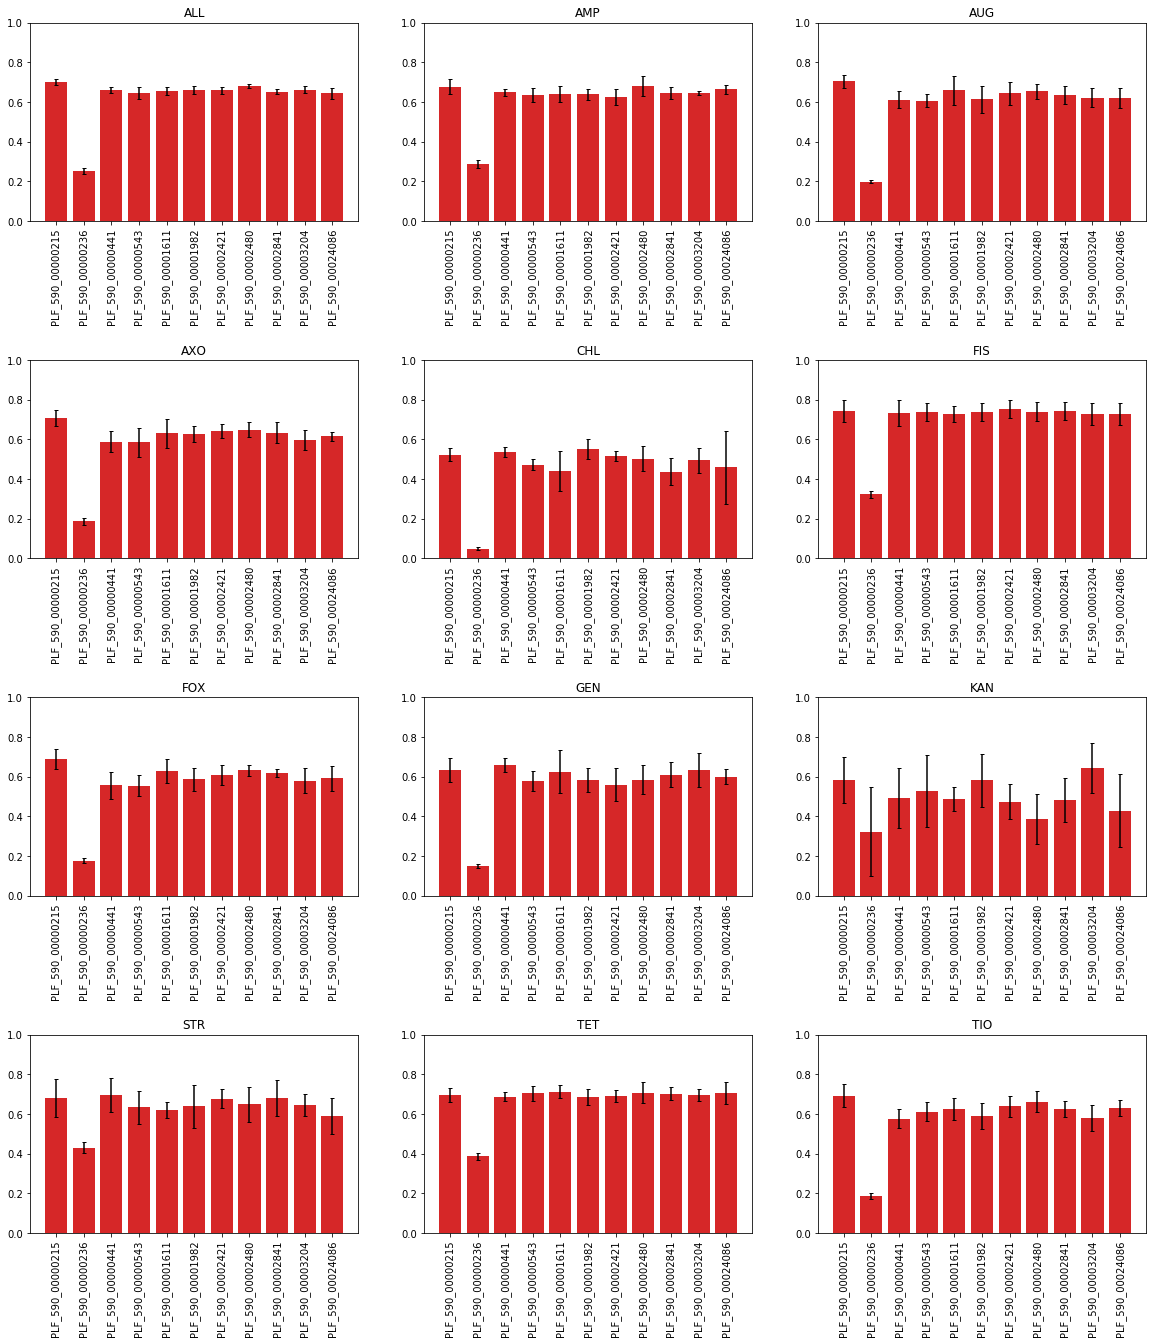

In [29]:
figure, axis = plt.subplots(nrows=4, ncols=3, figsize=(20, 17))


for row in range(4):
    for col in range(3):
        results_mean = results.loc[antibiotics[3*row+col]]
        results_std = std.loc[antibiotics[3*row+col]]
        axis[row, col].bar(range(11), results_mean, yerr = results_std, color = 'tab:red', ecolor = 'k', capsize=2, width = 0.8)
        axis[row, col].set_title(antibiotics[3*row+col])
        axis[row, col].set_ylim([0, 1])
        axis[row, col].set_xticks(range(11))
        axis[row, col].set_xticklabels(labels, rotation=90)
    
# for j in range(1,4):
#     results_mean = globals()[f'results_{j}'].mean(axis = 1)
#     results_std = globals()[f'results_{j}'].std(axis = 1)
#     for row in range(4):
#         for col in range(3):
#             val = results_mean.iloc[3*row+col]
#             err = results_std.iloc[3*row+col]
#             axis[row, col].bar(j, val, yerr = err, ecolor = 'k', width = 0.8, capsize=2, align = 'center', color = '#0088aa')
        
# for row in range(4):
#     for col in range(3):
#         axis[row, col].set_title(antibiotics[3*row+col])
#         axis[row, col].set_ylim([0.4, 0.8])
#         
#         axis[row, col].set_xticklabels(['AMR', 'Length 1', 'Length 2', 'Length 3'])
        
plt.subplots_adjust(top = 0.999, bottom=0.01, hspace=0.7, wspace=0.2)

In [44]:
results_0[0].values

array([0.721, 0.702, 0.713, 0.719, 0.54, 0.759, 0.684, 0.612, 0.587,
       0.761, 0.73, 0.732], dtype=object)